read
plot


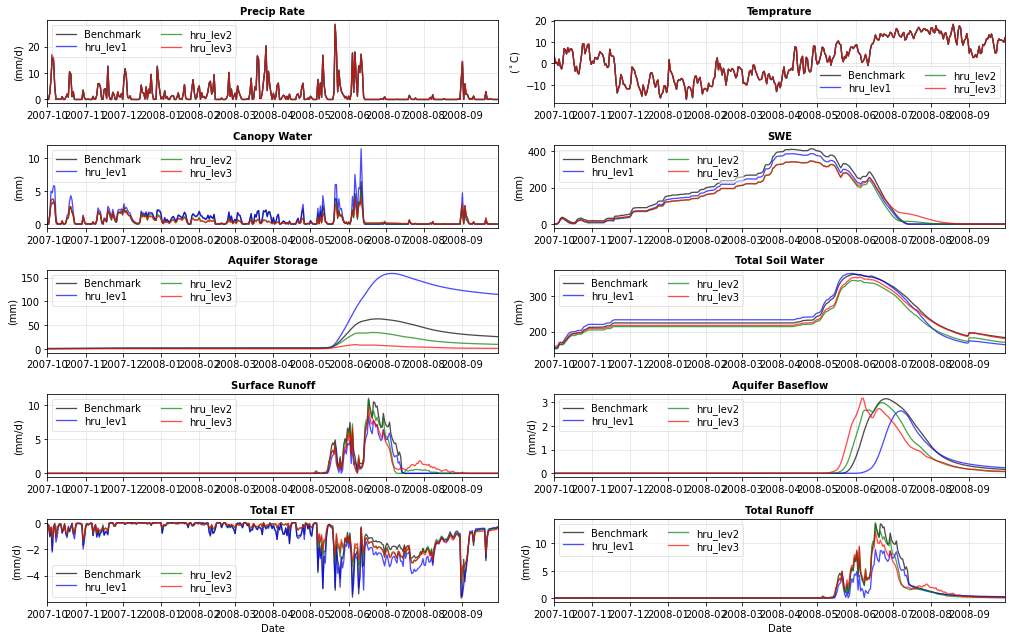

Done


In [1]:
# compare route outputs from different levels of complexity
import os, datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from PIL import Image

# ========== User settings ==================================
root_dir='/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/calib'
basinName='06279940'

# hru inputs
level_num=3
label_basename='hru_lev'

# observation inputs
obsFile=os.path.join(root_dir,'obs','obs_flow.'+basinName+'.cfs.csv')
obsVoid=-9999.0

# calib inputs
calib_run = 1

# plot inputs
time_format = '%Y-%m-%d'
plot_date_start = '2007-10-01'
plot_date_end = '2008-09-30'
plot_date_start_obj = datetime.datetime.strptime(plot_date_start, time_format)
plot_date_end_obj = datetime.datetime.strptime(plot_date_end, time_format)

var_names_summa = ['pptrate_mean', 'airtemp_mean', 'scalarCanopyWat', 'scalarSWE', 'scalarAquiferStorage', 
                  'scalarTotalSoilWat','scalarSurfaceRunoff_mean',  'scalarAquiferBaseflow_mean', 'scalarTotalET_mean', 'scalarTotalRunoff_mean'] #'scalarSoilBaseflow_mean'
var_units_summa = ['kg m-2 s-1', 'K', 'kg m-2', 'kg m-2','m', 'kg m-2', 'm s-1', 'm s-1', 'kg m-2 s-1', 'm s-1'] #'m s-1', 

var_names_plot = ['Precip Rate', 'Temprature', 'Canopy Water', 'SWE', 'Aquifer Storage', 
                 'Total Soil Water','Surface Runoff', 'Aquifer Baseflow', 'Total ET', 'Total Runoff'] # 'Soil Baseflow', 
var_units_plot = ['mm/d', '$^\circ$C', 'mm', 'mm','mm', 'mm', 'mm/d', 'mm/d', 'mm/d', 'mm/d'] #'mm/d',

output_dir=os.path.join(root_dir,basinName,'analysis/6c_plot_summa_output')
ofile = 'summa_output_'+basinName+'.png'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# ========== end User settings ==================================

# --- read summa simulated output
print('read')
data_dic = {}
var_units_update = []
for level_id in range(level_num+1):
    label=label_basename+str(level_id)
    data_lev_dic = {}
    
    q_ncfile = os.path.join(root_dir,basinName,label,'out_archive', 
                            str(calib_run),'wbout_day.nc')
    ds = xr.open_dataset(q_ncfile) 
    time = ds['time'].values[:]
    time = pd.to_datetime(time)
    
    for var_name in var_names_summa:                    

        var_value = ds[var_name].values[:] #(time, gru)
        var_unit = var_units_summa[var_names_summa.index(var_name)]

        if var_unit == 'kg m-2 s-1': # flux to mm/day
            var_value = var_value*86400 
        elif var_unit == 'kg m-2': # unit water storage to depth
            var_value = var_value
        elif var_unit == 'm s-1': # rate to mm/d
            var_value = var_value*1000*86400 
        elif var_unit == 'K': # temperature to C
            var_value = var_value - 273.15 
        elif var_unit == 'm': # to mm
            var_value = var_value*1000 

        df = pd.DataFrame(var_value, index=time)
        data_lev_dic[var_name] = df
    data_dic[label]=data_lev_dic

# --- plot summa simulated output
print('plot')
nrow, ncol = 5,2
fig, ax = plt.subplots(nrow, ncol,figsize=[7.08*2, 9]) #figsize=[7.08*2, 7.08*2]
lev_colors = ['k','b','g','r']
lev_labels = ['Benchmark','hru_lev1','hru_lev2','hru_lev3']

for i in range(nrow): 
    for j in range(ncol):
        k = i*ncol+j

        # Plot 
        if k < len(var_names_summa):
            # identify variable and unit 
            var_name_summa = var_names_summa[k]
            var_name_plot = var_names_plot[k]
            var_unit_plot = var_units_plot[k]           

            # plot each hru level
            for level_id in range(level_num+1):
                label=label_basename+str(level_id) 

                df = data_dic[label][var_name_summa] # dataframe (time, gru)
                df_cut = df.truncate(before=plot_date_start_obj, after=plot_date_end_obj)                
                df_cut_mean = df_cut.mean(axis=1, skipna=True) # dataframe (time), hru mean.
                
                ax[i,j].plot_date(df_cut.index, df_cut_mean, color=lev_colors[level_id], 
                                  linestyle='-',linewidth=1.3, markersize=0.0,alpha=0.7, label=lev_labels[level_id])

            # others
            ax[i,j].set_title(var_name_plot,fontsize='medium',weight='semibold')
            ax[i,j].set_xlim(df_cut.index[0],df_cut.index[-1])
#             ax[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax[i,j].xaxis.set_tick_params(labelsize='medium')#rotation=30,
            ax[i,j].legend(loc='best', fontsize='medium', framealpha=0.5, ncol=2,labelspacing=0.2) 

            if i == nrow-1:
                ax[i,j].set_xlabel('Date', fontsize='medium')
            ax[i,j].set_ylabel('('+var_unit_plot+')', fontsize='medium')
            ax[i,j].tick_params(direction='out', labelsize='medium')
            ax[i,j].grid(True,linewidth=0.5,alpha=0.5)         
            
        else:  # otherwise, don't plot
            ax[i, j].axis('off')

fig.tight_layout()
plt.savefig(os.path.join(output_dir,ofile), dpi=100)
plt.show()
plt.close(fig)
    
print('Done')

In [9]:
data_dic['hru_lev3']['airtemp_mean']

4

In [41]:
row_num

11